# Project: Dog Ratings Data Wrangling and Analyzing

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import wptools
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
# This is to display the first 3 rows in the dataframe that i have directly imported into the notebook
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#create a folder for the file and use 'requests' to download it programmatically from the udacity servers us
folder_name='tweet_image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response
#The response will display '200' if the process is correct

<Response [200]>

In [4]:
#This is to open the file
with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb')as file:
    file.write(response.content)

In [5]:
#To check if the file we downloaded is in the folder
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
# To read the downloaded file into a dataframe in the notebook taking note of the type of file
df_image = pd.read_csv('tweet_image_prediction/image-predictions.tsv', sep = '\t')
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# This is to import the 3rd set of data
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [9]:
# This is to read the json file into a dictionary then into a dataframe
import json
with open('tweet-json.txt', 'r') as f:
  dictlist = [json.loads(x) for x in f]
df_json=pd.DataFrame(dictlist)

In [10]:
# This is to display the first 3 rows in the 3rd dataframe which we have to clean later on
df_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing the 1st dataframe to get the quality issues i am going to clean

In [11]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Assessment issues
1. source columns has html residue
2. The last four columns have a lot of None values
3. There are NaN values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Assessment issues
1. timestamp is in a wrong datatype
2. The heading of timestamp, text, name and source is not well descriptive 
3. The source column datatype is wrong

In [13]:
for columnName in ['doggo', 'floofer', 'pupper', 'puppo']:
    print(df[columnName].value_counts())
   

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


The above code is to check the value count of the values in the columns listed. The reason for doing this is when we viewed the database using head we saw that there were some rows which were none but not null when we used info. From this we can see that these four columns can be merged into 1 column since they are all refering to a dog stage

#### Assessing the 2nd dataframe to get the quality issues i am going to clean

In [14]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Issues
1. For this dataset reducing the decimal points in the p1_conf, p2_conf and p3_conf will make the figures look tidy
2. Rename the p1, p2, p3 and their conf to more explanatory headings

In [15]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### All the columns are in the correct datatype

In [17]:
for columnName in ['p1', 'p2', 'p3']:
    print(df_image[columnName].value_counts())
   

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64


##### There seems to be no null values in these 3 columns

In [18]:
#This is to check for duplication in the rows
df_image[df_image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### There is no dupication in this dataset

#### Assessing the 3rd dataframe to get the quality issues i am going to clean

In [19]:
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


#### ISSUES
1. There are many unwanted columns in this dataset which are going to be dropped

In [20]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### Issues
1. The id columns needs to be renamed to match with the other datasets

In [21]:
#To check if there are duplicated columns in the 3 dataframes
all_columns = pd.Series(list(df) + list(df_image) + list(df_json))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

#### Issues
There are duplicated columns in the 3 dataset that needs to be dropped before merging to prevent duplication in a master dataset

In [22]:
df_json[df_json.id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


#### There are no duplicated rows in this data set

### Quality issues
These are the quality issues observed across the 3 dataframes

1. df'timestamp' and 'source' is in wrong datatype

2. df'source' still has the html residues

3. df'timestamp, text, name, source', df_image'p1, p2, p3 and their conf' do not have a clear descriptive heading

4. Reduce the decimal points in the p1_conf, p2_conf and p3_conf

5. df_json[id] does not have the correct naming. it has the tweet id so the heading needs to be changed

6. df_json columns that are not needed should be dropped

7. df dataframe has retweets. We only need the original tweets

8. df dataframe columns that are not needed should be dropped


### Tidiness issues
1. The information in the df_json dataframe and df_image dataframe is needed in the df dataframe

2. The stages of dog is spread out into four columns instead of one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_clean=df.copy()
df_image_clean=df_image.copy()
df_json_clean=df_json.copy()

### Issue #1: df'timestamp' and 'source' is in wrong datatype

#### Define: 
1. Change the datatype of timestamp in the df_clean dataframe from object/string to datetime
2. Change the datatype of source(now tweet_source) from object/string to category

#### Code

In [24]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['source'] = df_clean['source'].astype('category')

#### Test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

As seen in the test section the datatype of timestamp and source has changed to datetime and category respectively

### Issue #2: source column still has some html residue

#### Define: Clean by removing the html residue and leaving the tweet source 

#### Code

In [26]:
import re as re

# using regular expressions and functions to remove the html residue in the source column
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df_clean['source']=df_clean['source'].apply(lambda cw : remove_tags(cw))

In [27]:
df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

This shows that we have four sources of the tweets. To make the source more specific i will clean it further to get the specific platform that was used to make the tweet that is iPhone', 'Web', 'Vine', 'TweetDeck'

In [28]:
source = ['iPhone', 'Web', 'Vine', 'TweetDeck']
df_clean['source'] = df_clean['source'].apply(lambda x: next((i for i in source if i.lower() in x.lower().split()), 'N/A'))
# .lower() is to make it case insensitive.

#### Test

In [29]:
df_clean.source.value_counts()

iPhone       2221
Vine           91
Web            33
TweetDeck      11
Name: source, dtype: int64

### Issue #3: df'timestamp, text, name, source', df_image'p1, p2, p3 and their conf' do not have a clear descriptive heading

#### Define: 
1. Rename the timestamp column as created_at 
2. Rename the text column as tweet_text 
3. Rename the name column as dog_name 
4. Rename the source column as tweet_source 
5. Rename the p1 as breed1
6. Rename the p2 as breed2
7. Rename the p3 as breed3
8. Rename the p1_conf as breed1_conf
9. Rename the p2_conf as breed2_conf
10. Rename the p3_conf as breed3_conf

#### Code

In [30]:
df_clean.rename(columns={'timestamp':'created_at', 'text':'tweet_text', 'name':'dog_name', 
                         'source':'tweet_source'}, inplace=True)
df_image_clean.rename(columns={'p1':'breed1','p1_conf':'breed1_conf', 'p2':'breed2',
                               'p2_conf':'breed2_conf', 'p3':'breed3', 'p3_conf':'breed3_conf',
                              'p1_dog':'breed1_status','p2_dog':'breed2_status','p3_dog':'breed3_status'}, inplace=True)

#### Test

In [31]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'created_at', 'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'dog_name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [32]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed1', 'breed1_conf',
       'breed1_status', 'breed2', 'breed2_conf', 'breed2_status', 'breed3',
       'breed3_conf', 'breed3_status'],
      dtype='object')

The columns headings have changed to their new values

### Issue #4: Reduce the decimal points in the p1_conf, p2_conf and p3_conf

#### Define:
Reduce the number of decimal places from 6 to 3 in p1_conf, p2_conf and p3_conf(now breed1_conf, breed2_conf and breed3_conf)

#### Code

In [33]:
df_image_clean= df_image_clean.round(decimals=3)

#### Test

In [34]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,breed1,breed1_conf,breed1_status,breed2,breed2_conf,breed2_status,breed3,breed3_conf,breed3_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True


### Issue #5: df_json[id] does not have the correct naming. it has the tweet id so the heading needs to be changed

#### Define: Change the name of the id column to tweet_id

#### Code

In [35]:
df_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [36]:
df_json_clean.head(0)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


The name of the id column has changed to tweet_id

### Issue #6: df_json columns that are not needed should be dropped

#### Define: Drop the columns that will not be needed for this analysis

#### Code

In [37]:
df_json_clean.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [38]:
df_json_clean.drop(['created_at','id_str', 'full_text', 'truncated','display_text_range', 'entities', 'extended_entities', 'source',
                    'in_reply_to_status_id', 'in_reply_to_status_id_str',
                    'in_reply_to_user_id', 'in_reply_to_user_id_str',
                    'in_reply_to_screen_name', 'geo', 'coordinates', 'place',
                    'contributors', 'is_quote_status', 'possibly_sensitive',
                    'possibly_sensitive_appealable', 'lang', 'retweeted_status',
                    'quoted_status_id', 'quoted_status_id_str', 'quoted_status','user', 'favorited', 'retweeted'], axis=1, inplace=True)

#### Test

In [39]:
df_json_clean.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


### Issue #7: df dataframe has retweets. We only need the original tweets

#### Define: Remove the tweets that have been retweeted by using the retweeted_status_id to filter them out and drop them

#### Code

In [40]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'created_at', 'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'dog_name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [41]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

#### Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   created_at                  2175 non-null   datetime64[ns, UTC]
 4   tweet_source                2175 non-null   category           
 5   tweet_text                  2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

This shows that all the retweets have been removed

### Issue #8: There are columns that are not needed in the df dataframe

#### Define:Drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [43]:
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [44]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'created_at', 'tweet_source', 'tweet_text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #9: Additional data in df_json dataframe

#### Define: Merge the df_json_clean and df_image_clean dataframe to the df_clean dataframe joining on tweet_id

#### Code

In [45]:
df_clean = pd.merge(df_clean, df_json_clean, on=['tweet_id'], how='left')
df_clean = pd.merge(df_clean, df_image_clean, on=['tweet_id'], how='left')

#### Test

In [46]:
df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_at,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,...,img_num,breed1,breed1_conf,breed1_status,breed2,breed2_conf,breed2_status,breed3,breed3_conf,breed3_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097,False,bagel,0.086,False,banana,0.076,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.324,True,Pekinese,0.091,True,papillon,0.069,True


### Issue #10: The stages of dog is spread out into four columns instead of one column

#### Define: Merge the doggo, floofer, pupper and puppo columns into 1 column

#### Code

In [47]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean['dog_stage'] = df_clean[cols].apply(lambda row: '&'.join(row.values.astype(str)), axis=1)
df_clean.dog_stage.value_counts()

None&None&None&None        1831
None&None&pupper&None       224
doggo&None&None&None         75
None&None&None&puppo         24
doggo&None&pupper&None       10
None&floofer&None&None        9
doggo&None&None&puppo         1
doggo&floofer&None&None       1
Name: dog_stage, dtype: int64

In [48]:
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace('&None', '')
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace('None&', '')
df_clean.dog_stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo&pupper       10
floofer             9
doggo&puppo         1
doggo&floofer       1
Name: dog_stage, dtype: int64

In [49]:
#This is to drop the columns that were merged
df_clean.drop(['doggo', 'floofer', 'pupper','puppo'], axis=1, inplace=True)

#### Test

In [50]:
df_clean.dog_stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo&pupper       10
floofer             9
doggo&puppo         1
doggo&floofer       1
Name: dog_stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [52]:
df_cleaned=pd.read_csv('twitter_archive_master.csv')

In [53]:
df_cleaned.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_at,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,...,breed1,breed1_conf,breed1_status,breed2,breed2_conf,breed2_status,breed3,breed3_conf,breed3_status,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,orange,0.097,False,bagel,0.086,False,banana,0.076,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,Chihuahua,0.324,True,Pekinese,0.091,True,papillon,0.069,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,Chihuahua,0.716,True,malamute,0.078,True,kelpie,0.031,True,None


In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   created_at             2175 non-null   object 
 4   tweet_source           2175 non-null   object 
 5   tweet_text             2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   dog_name               2175 non-null   object 
 10  retweet_count          2175 non-null   int64  
 11  favorite_count         2175 non-null   int64  
 12  jpg_url                1994 non-null   object 
 13  img_num                1994 non-null   float64
 14  breed1                 1994 non-null   object 
 15  bree

### Insights:
1. The percentage of the tweets that came from each tweet source

2. The distribution of the dog stages

3. The percentage of retweet for each dog stage

#### Insight 1: The distribution of tweets fron the different tweet source

In [55]:
df_cleaned.tweet_source.value_counts()

iPhone       2042
Vine           91
Web            31
TweetDeck      11
Name: tweet_source, dtype: int64

In [56]:
df_cleaned.tweet_source.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

iPhone       93.9%
Vine          4.2%
Web           1.4%
TweetDeck     0.5%
Name: tweet_source, dtype: object

To show above insight in a visualization

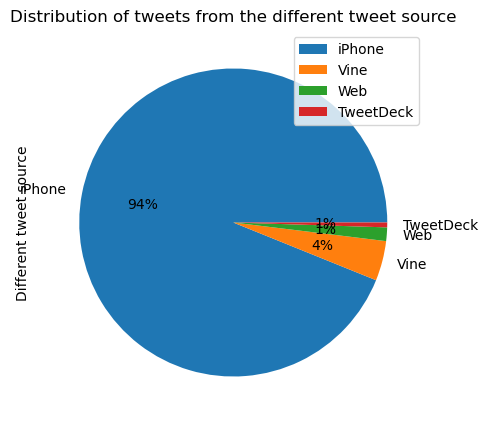

In [57]:
df_cleaned['tweet_source'].value_counts().plot(kind='pie',autopct='%1.0f%%',ylabel='Different tweet source',
                                              title='Distribution of tweets from the different tweet source',
                                              figsize=(5,5))
plt.legend()

According to the visualization above 94% of the tweets came from IPhone, 4% from Vine, 1% from TweetDeck and 1% from the Web

#### Insight 2: The distribution of the dog stages

In [58]:
df_cleaned.dog_stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo&pupper       10
floofer             9
doggo&puppo         1
doggo&floofer       1
Name: dog_stage, dtype: int64

In [59]:
df_cleaned.dog_stage.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

None             84.2%
pupper           10.3%
doggo             3.4%
puppo             1.1%
doggo&pupper      0.5%
floofer           0.4%
doggo&puppo       0.0%
doggo&floofer     0.0%
Name: dog_stage, dtype: object

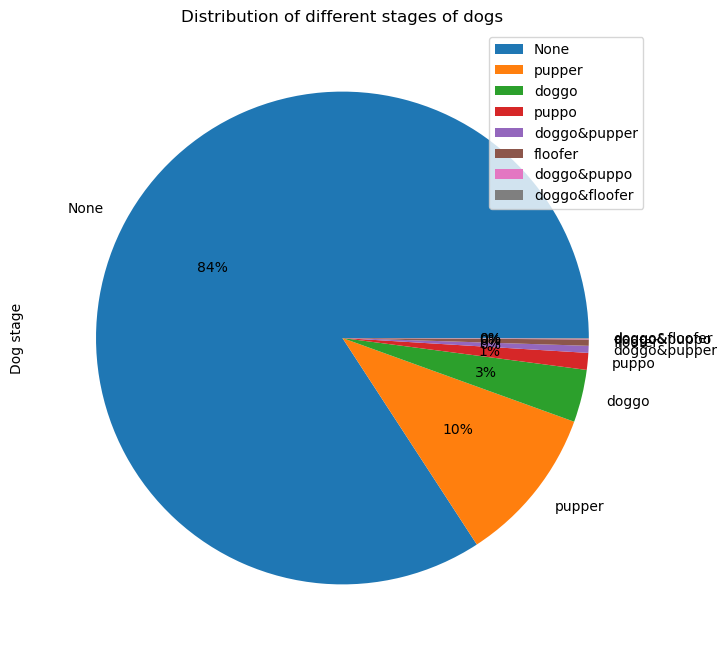

In [60]:
df_cleaned['dog_stage'].value_counts().plot(kind='pie',autopct='%1.0f%%',ylabel='Dog stage',
                                              title='Distribution of different stages of dogs',
                                              figsize=(8,8))
plt.legend(loc="best")

84% of the dogs do not have any stage assigned to them while the remaining 16% are either doggo, floofer, pupper, puppo or have 2 stages assigned to them.

#### Insight 3: The retweet for each dog stage

In [61]:
df_cleaned.groupby(['dog_stage']).mean('retweet_count')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,breed1_conf,breed2_conf,breed3_conf
dog_stage,,,,,,,,,,,
None,7.356762e+17,7.458184e+17,1.200783e+16,13.600218,10.585472,2577.940470,8371.456581,1.191943,0.590559,0.134182,0.060973
doggo,7.945997e+17,7.716345e+17,1.675001e+09,11.853333,10.000000,6348.786667,17369.093333,1.285714,0.577032,0.157397,0.062111
doggo&floofer,8.540102e+17,NaN,NaN,11.000000,10.000000,3433.000000,17169.000000,1.000000,0.355000,0.178000,0.132000
doggo&pupper,7.781766e+17,7.331095e+17,4.196984e+09,11.100000,10.000000,3971.200000,12077.100000,1.111111,0.833444,0.082889,0.027889
doggo&puppo,8.558515e+17,NaN,NaN,13.000000,10.000000,19196.000000,47844.000000,1.000000,0.322000,0.115000,0.096000
floofer,7.558218e+17,NaN,NaN,11.888889,10.000000,4155.888889,11064.444444,1.142857,0.609143,0.155143,0.048000
pupper,7.185570e+17,7.071910e+17,4.196984e+09,10.808036,10.000000,2457.723214,7176.267857,1.251232,0.604685,0.130581,0.056690
puppo,8.070064e+17,7.727430e+17,7.305050e+17,12.041667,10.000000,6332.500000,20788.875000,1.454545,0.722227,0.135409,0.043682


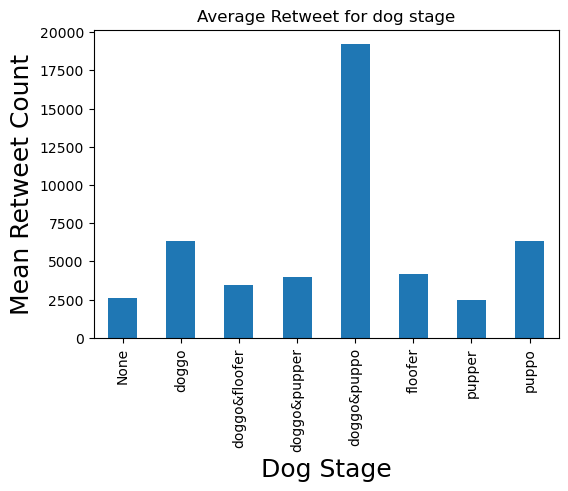

In [62]:
def df_bar(counts, xlabel, ylabel, title):
    counts.plot(kind ='bar', title=title, figsize=(6,4))
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)   
    plt.show()
counts=df_cleaned.groupby(['dog_stage']).mean()['retweet_count']
df_bar(counts,'Dog Stage','Mean Retweet Count','Average Retweet for dog stage')

The above chart shows that the retweet of the dog with 2 stages is higher than those with 1 stage

https://www.w3resource.com/python-exercises/pandas/string/python-pandas-string-exercise-41.php

https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

https://www.tutorialspoint.com/

https://stackoverflow.com/

https://github.com/